# <span style="font-family: 'Computer Modern'; font-size: 42pt; font-weight: bold;">Quantum Convolutional Neural Network (QCNN): *Laboratory of Particle Physics and Cosmology (LPPC)*</span>

In [9]:
### ***** IMPORTS / DEPENDENCIES *****:

## PLOTTING:
import matplotlib as mpl # (NOT ACCESSED)
import matplotlib.pyplot as plt

## PENNYLANE:
import pennylane as qml
from pennylane import numpy as np

## DATA:
import numpy as np
import pandas as pd
import seaborn as sns

## JAX:
import jax;
## JAX CONFIGURATIONS:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
# import jax.experimental.sparse as jsp # (NOT ACCESSED)
# import jax.scipy.linalg as jsl  # (NOT ACCESSED)

## OTHER:
sns.set()
# from glob import glob

## RANDOM NUMBER GENERATOR:
seed = 0
rng = np.random.default_rng(seed=seed) # ORIGINAL

# *1* Define 'rng' with JAX NumPy:
# rng = jax.random.PRNGKey(seed=seed)

# *2* Define 'rng' with NumPy, convert to JAX NumPy:
# rng = np.random.default_rng(seed=seed)
# random_numbers_jnp = jnp.array(rng.random(size=10))

In [10]:
### ***** PACKAGE IMPORTS (IN PROGRESS) *****:
# ****************************************************************************************
## *1* MNIST DATA LOADING CLASS:
# from lppc_qcnn.load_qc_data import LoadDataQC # LoadDataQC() <--- STATIC METHOD

## *2* QUANTUM CIRCUIT AND LAYERS CLASS:
# from lppc_qcnn.circuit_layers import LayersQC # LayersQC() <--- INSTANCE METHOD (SELF)
# -> Define Instance of LayersQC:
# layers_obj = LayersQC()

## *3* TRAIN QCNN / RESULTS CLASS:
# from lppc_qcnn.circuit_layers import TrainQC # TrainQC() <--- INSTANCE METHOD (SELF)
# -> Define Instance of TrainQC:
# layers_obj = TrainQC()

## *4* QUANTUM AND MATH OPERATORS CLASS:
# from lppc_qcnn.qc_operators import QuantumMathOps # <--- STATIC METHOD
# ****************************************************************************************

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 24pt;">LOADING MNIST DATASET</span>

In [11]:
# ********************************************
#           INITIAL PARAMETER SETUP
# ********************************************

## MNIST DATA LOADING CLASS:
from lppc_qcnn.load_qc_data import LoadDataQC # <--- STATIC METHOD

## DEFINE VARIABLES:
n_qubits = 6 # Number of qubits
active_qubits = 6 # Active qubits
# active_qubits = list(range(active_qubits))
num_wires = 6 # Number of wires
num_wires_draw = 2 # Number of wires (DRAWINGS)
# num_wires_test = 4 # Number of wires (TEST)

## QUANTUM DEVICE:
# device = qml.device("default.mixed", wires=num_wires)
device = qml.device("default.qubit", wires=num_wires) # Six-qubit device

In [12]:
# ********************************************
#          LOADING THE MNIST DATASET
# ********************************************

## DEFINE VARIABLES (DATA):
num_train = 2 # Binary classification
num_test = 2

### ***** JAX-WRAPPED FUNCTION(S) *****:
'''
# Wrap 'load_digits_data' with JAX:
@jax.jit
def load_data(num_train, num_test, rng):
    return LoadDataQC.load_digits_data(num_train, num_test, rng)

# Call static method of [LoadDataQC] to load data (digits):
x_train, y_train, x_test, y_test = load_data(num_train=num_train, num_test=num_test, rng=rng) # (WRAPPED WITH JAX)
# x_train, y_train, x_test, y_test = load_data(num_train, num_test, rng)
'''

### ***** ORIGINAL FUNCTION(S) *****:
# Call static method of [LoadDataQC] to load data (digits):
x_train, y_train, x_test, y_test = LoadDataQC.load_digits_data(num_train, num_test, rng)

##           *** FUNCTIONALITY CHECK PRINT STATEMENTS (DATA) ***
# -------------------------------------------------------------------------
print(f"{'='*15} FUNCTIONALITY CHECK (MNIST DATA) {'='*15}")

# Shapes and Types:
print(f"\n{'='*14} (1) SHAPES AND TYPES {'='*14}")
print(f"• x_train type:  {type(x_train)}  | shape:  {x_train.shape}")
print(f"• y_train type:  {type(y_train)}  | shape:  {y_train.shape}")
print(f"• x_test type:  {type(x_test)}  | shape:  {x_test.shape}")
print(f"• y_test type:  {type(y_test)}  | shape:  {y_test.shape}")

# Normalization:
print(f"\n{'='*10} (2) NORMALIZATION {'='*10}")
# print(f"• x_train first row norm:  {jnp.linalg.norm(x_train[0])}")
print(f"• x_train first row norm:  {np.linalg.norm(x_train[0])}")
# print(f"• x_test first row norm:  {jnp.linalg.norm(x_test[0])}")
print(f"• x_test first row norm:  {np.linalg.norm(x_test[0])}")

# Label Uniqueness:
print(f"\n{'='*10} (3) LABEL UNIQUENESS {'='*10}")
# print(f"• Unique labels -> y_train:  {jnp.unique(y_train)}")
print(f"• Unique labels -> y_train:  {np.unique(y_train)}")
# print(f"• Unique labels -> y_test:  {jnp.unique(y_test)}")
print(f"• Unique labels -> y_test:  {np.unique(y_test)}")
# -------------------------------------------------------------------------

=============== FUNCTIONALITY CHECK (MNIST DATA) ===============

============== (1) SHAPES AND TYPES ==============
• x_train type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2, 64)
• y_train type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2,)
• x_test type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2, 64)
• y_test type:  <class 'jaxlib.xla_extension.ArrayImpl'>  | shape:  (2,)

========== (2) NORMALIZATION ==========
• x_train first row norm:  1.0
• x_test first row norm:  1.0

========== (3) LABEL UNIQUENESS ==========
• Unique labels -> y_train:  [1]
• Unique labels -> y_test:  [0 1]


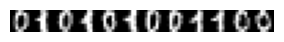

In [13]:
# ********************************************
#        VISUALIZING THE MNIST DATASET
# ********************************************

## DRAW MNIST IMAGE:
LoadDataQC.draw_mnist_data()

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 24pt;">CONSTRUCTING QUANTUM CIRCUIT</span>

/Users/seanchisholm/VSCode_LPPC/qcnn-lppc/.conda/lib/python3.11/site-packages/pennylane/drawer/mpldrawer.py:581: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  bbox = text_obj.get_window_extent(renderer)
/Users/seanchisholm/VSCode_LPPC/qcnn-lppc/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


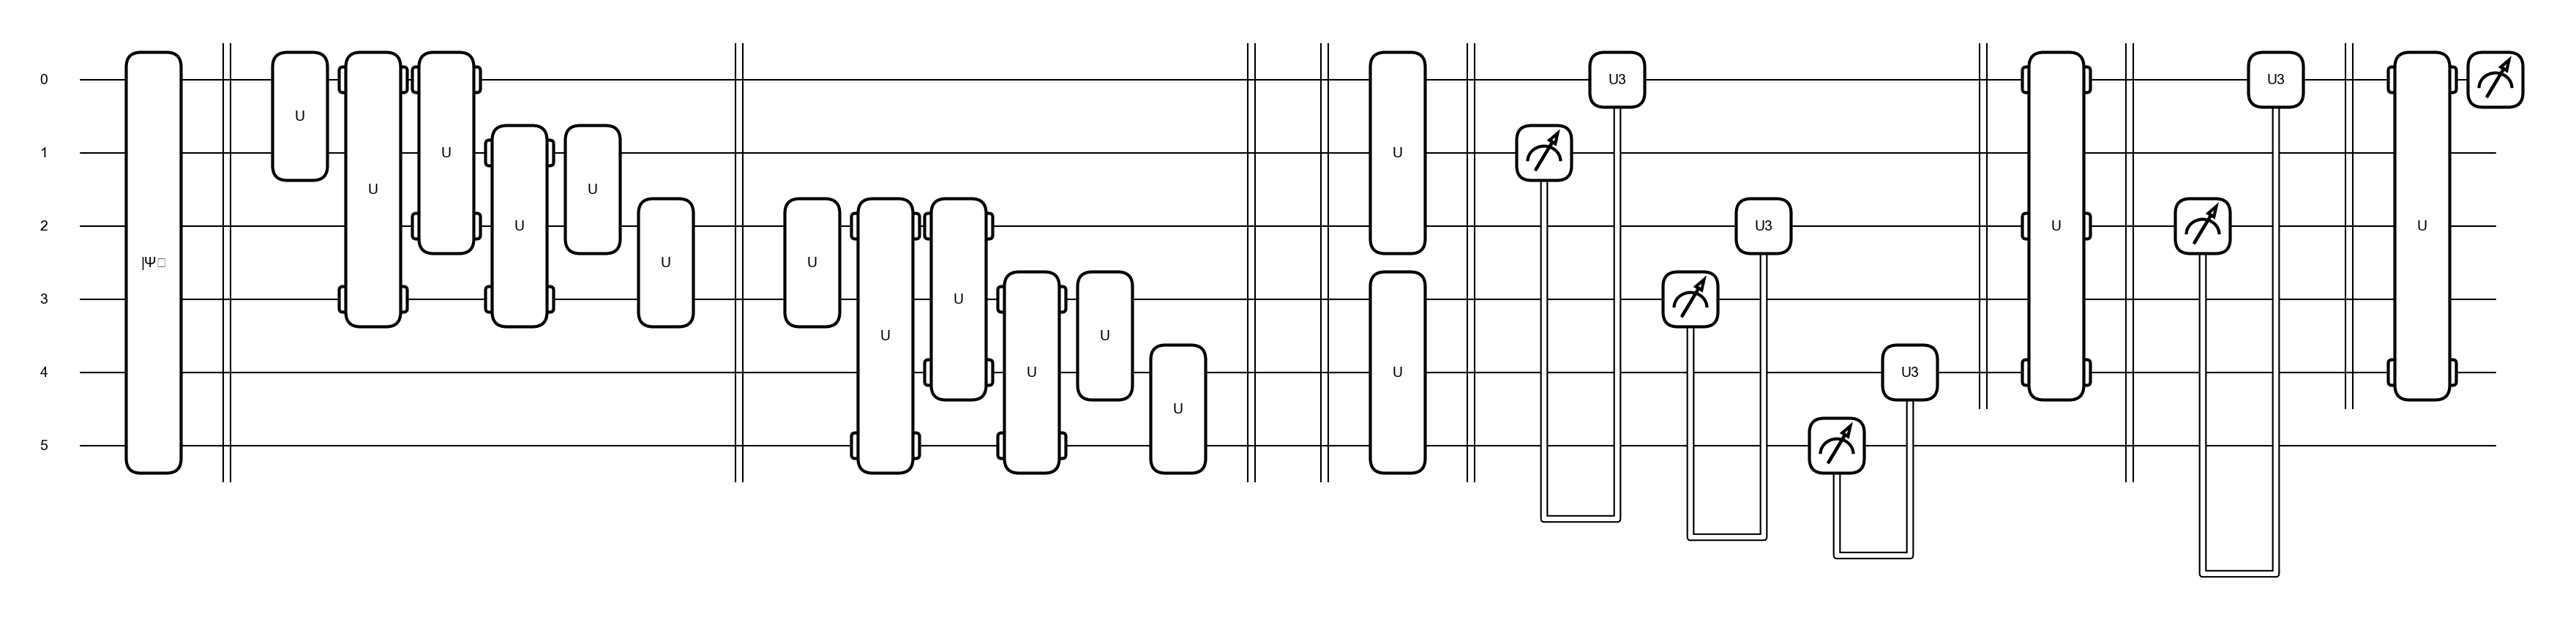

In [14]:
# ********************************************
#    VISUALIZING / PLOTTING QUANTUM CIRCUIT
# ********************************************

## QUANTUM CIRCUIT AND LAYERS CLASS:
from lppc_qcnn.circuit_layers import LayersQC # <--- INSTANCE METHOD (SELF)
# Define Instance of LayersQC:
layers_obj = LayersQC()

## DEFINE SAMPLE WEIGHTS / FEATURES:
# (Note: Adjust second dimension as needed)
weights = np.random.rand(81, 2) # <--- SHAPE ~ [(num_wires // 2) * (3 ** 3)]
# weights = jnp.array(weights) # WRAP WITH JAX
# weights = np.random.rand(num_wires, 2)
last_layer_weights = np.random.rand(4 ** 2 - 1)
# last_layer_weights = jnp.array(last_layer_weights) # WRAP WITH JAX
# last_layer_weights = np.random.rand(4 ** (num_wires // 2) - 1)
features = np.random.rand(2 ** num_wires)
# features = jnp.array(features) # WRAP WITH JAX

## DRAW QUANTUM CIRCUIT:
fig, ax = qml.draw_mpl(layers_obj.conv_net)(
layers_obj, weights, last_layer_weights, features
)

plt.show()

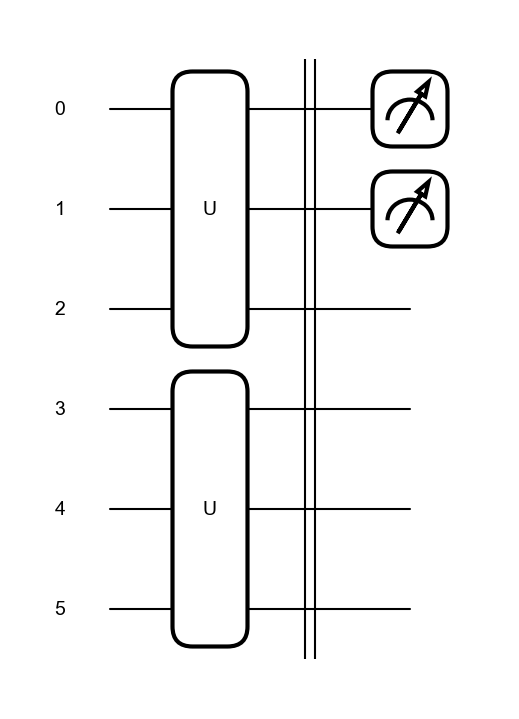

In [15]:
## DEFINE VARIABLES (CONV DRAWING):
n_qubits = 6  # Number of qubits
active_qubits = list(range(n_qubits))  # Active qubits
num_wires = 6  # Number of wires
num_wires_draw = 2  # Number of wires (DRAWINGS)

params_conv = weights[:, 0]  # Use appropriate slicing based on your need

## CONVOLUTIONAL LAYER:
@qml.qnode(device)
def conv_circuit(params, active_qubits):
    layers_obj.three_conv_layer(params, active_qubits)
    return qml.probs(wires=active_qubits[:num_wires_draw])

## DRAW CONVOLUTIONAL LAYER CIRCUIT:
fig, ax = qml.draw_mpl(conv_circuit)(params_conv, active_qubits)
plt.show()

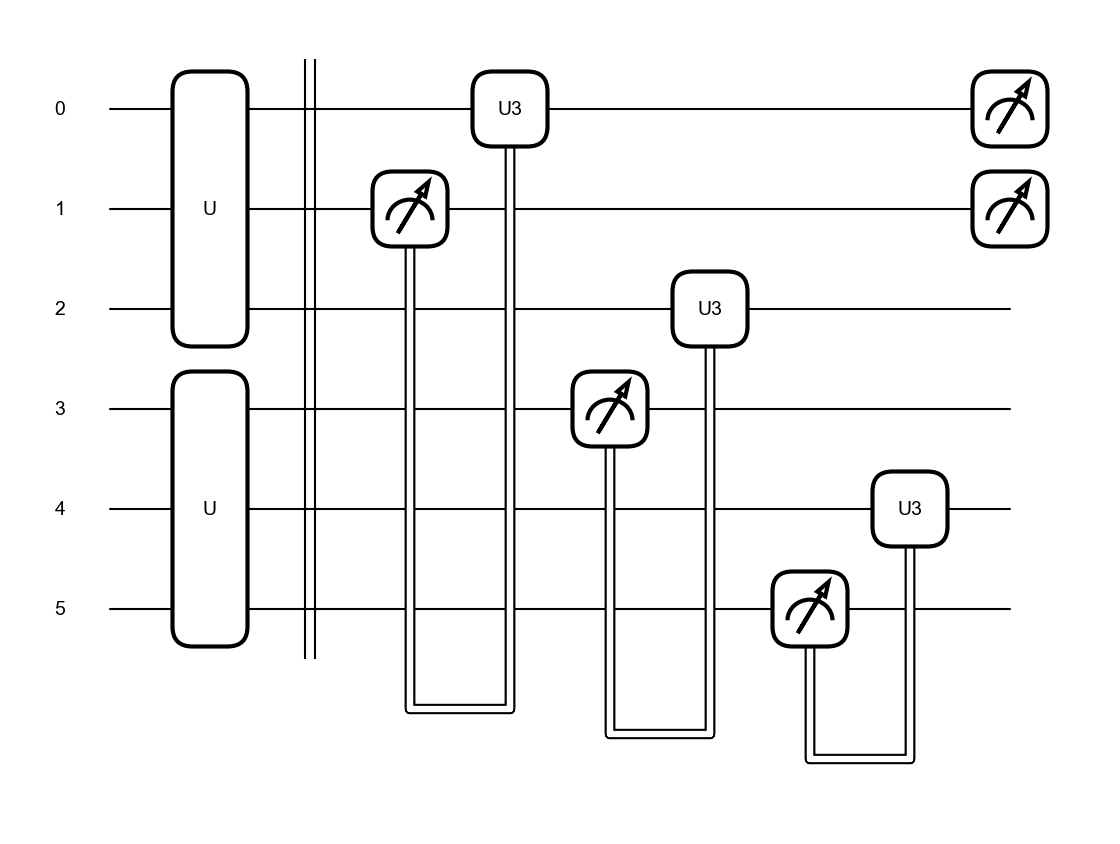

In [16]:
## CONVOLUTIONAL AND POOLING LAYER:
@qml.qnode(device)
def conv_and_pooling_circuit(kernel_weights, n_wires):
    layers_obj.conv_and_pooling(kernel_weights, n_wires)
    return qml.probs(wires=n_wires[:num_wires_draw])

## DRAW CONVOLUTIONAL AND POOLING LAYER CIRCUIT:
fig, ax = qml.draw_mpl(conv_and_pooling_circuit)(weights[:, 0], active_qubits)
plt.show()

In [17]:
## QUANTUM AND MATH OPERATORS CLASS:
from lppc_qcnn.qc_operators import QuantumMathOps # <--- STATIC METHOD
# Define Instance of LayersQC:
qmo_obj = QuantumMathOps()

## DEFINE SAMPLE PARAMETERS:
params = np.random.rand(2**3)
control_qubit_indices = [0, 1, 2]
target_qubit_index = 3

## UNIFORMLY-CONTROLLED ROTATION:
@qml.qnode(device)
def controlled_rot_circuit(params, control_qubit_indices, target_qubit_index, axis='z'):
    qmo_obj.generate_uniformly_controlled_rotation(params, control_qubit_indices, target_qubit_index, axis=axis)
    return qml.probs(wires=[target_qubit_index])

## DRAW UNIFORMLY-CONTROLLED ROTATION CIRCUIT:
# fig, ax = qml.draw_mpl(controlled_rot_circuit)(params, control_qubit_indices, target_qubit_index, 'z')
# plt.show()

In [18]:
# ********************************************
#         TRAINING QCNN / RESULTS (V2)
# ********************************************

'''
## TRAINING QCNN CLASS:
from lppc_qcnn.circuit_layers import TrainQC  # TrainQC() <--- INSTANCE METHOD (SELF)

# Define Instance of TrainQC:
# train_obj = TrainQC
train_obj = TrainQC()

## DEFINE TRAIN PARAMETERS:
n_test = 2
n_train = 2
n_epochs = 100
n_reps = 10

# Define wrapper function to call method and apply jax:
@jax.jit
def run_iterations(n_train, n_test):
    return train_obj.run_iterations(n_train=n_train, n_test=n_test)

## RUN TRAINING LOOP:
train_sizes = [2]
results_df = run_iterations(n_train=n_train, n_test=n_test)
for n_train in train_sizes[1:]:
    results_df = pd.concat([results_df, run_iterations(n_train=n_train, n_test=n_test)])
'''

'\n## TRAINING QCNN CLASS:\nfrom lppc_qcnn.circuit_layers import TrainQC  # TrainQC() <--- INSTANCE METHOD (SELF)\n\n# Define Instance of TrainQC:\n# train_obj = TrainQC\ntrain_obj = TrainQC()\n\n## DEFINE TRAIN PARAMETERS:\nn_test = 2\nn_train = 2\nn_epochs = 100\nn_reps = 10\n\n# Define wrapper function to call method and apply jax:\n@jax.jit\ndef run_iterations(n_train, n_test):\n    return train_obj.run_iterations(n_train=n_train, n_test=n_test)\n\n## RUN TRAINING LOOP:\ntrain_sizes = [2]\nresults_df = run_iterations(n_train=n_train, n_test=n_test)\nfor n_train in train_sizes[1:]:\n    results_df = pd.concat([results_df, run_iterations(n_train=n_train, n_test=n_test)])\n'

In [20]:
# ********************************************
#         TRAINING QCNN / RESULTS (V1)
# ********************************************

## TRAINING QCNN CLASS:
from lppc_qcnn.circuit_layers import TrainQC  # TrainQC() <--- INSTANCE METHOD (SELF)

# Define Instance of TrainQC:
# train_obj = TrainQC
train_obj = TrainQC()

## DEFINE TRAIN PARAMETERS:
n_test = 2
n_train = 2
n_epochs = 100
n_reps = 10

# Load data outside JIT-compiled function (as needed):
#x_train, y_train, x_test, y_test = LoadDataQC.load_digits_data(n_train, n_test, rng)

# Define wrapper function to call method and apply jax:
@jax.jit
def compute_results(n_train, n_test):
    return train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test)

# Run training for multiple sizes and aggregate results:
results_df = compute_results(n_train=n_train, n_test=n_test) # *4 (WRAPPED WITH JAX) *

'''
# Run training for multiple sizes and aggregate results:
# results_df = train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test) # *3*
## ALTERNATES:
#results_df = train_obj.compute_aggregated_results(train_obj, n_train, n_test)  # *1*
#results_df = train_obj.compute_aggregated_results(n_train, n_test)  # *2*
#results_df = train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test) # *3*
'''

TypeError: Cannot interpret value of type <class 'lppc_qcnn.circuit_layers.TrainQC'> as an abstract array; it does not have a dtype attribute

In [ ]:
# Wrap 'compute_aggregated_results' with JAX:
@jax.jit
def compute_results(n_train, n_test):
    return train_obj.compute_aggregated_results(n_train=n_train, n_test=n_test)

results_df = compute_results(n_train=n_train, n_test=n_test) # (WRAPPED WITH JAX)

In [ ]:
## DOCSTRING AND SOURCE CODE OF 'compute_aggregated_results' METHOD:
train_obj.compute_aggregated_results??

In [ ]:
# ********************************************
#     PLOTTING AGGREGATED TRAINING RESULTS
# ********************************************

## DEFINE TRAIN PARAMETERS (ALSO ABOVE):
# n_test = 2
n_train = 2
n_epochs = 100
steps = 100
# train_obj = TrainQC() (RECALL)

# Plot aggregated training results:
train_obj.plot_aggregated_results(train_obj, results_df, n_train, steps=n_epochs, 
                                  title_loss='Train and Test Losses', 
                                  title_accuracy='Train and Test Accuracies', 
                                  markevery=10)
## ALTERNATES:
# train_obj.plot_aggregated_results(results_df, n_train, steps, 
#                                   title_loss='Train and Test Losses', 
#                                   title_accuracy='Train and Test Accuracies', 
#                                   markevery=10) # (NO SELF)
# train_obj.plot_aggregated_results(results_df, n_train=n_train, steps=steps, 
#                                   title_loss='Train and Test Losses', 
#                                   title_accuracy='Train and Test Accuracies', 
#                                   markevery=10)

***

<span style="font-family: 'Computer Modern'; font-weight: bold; font-size: 24pt;">CODE TESTING / VALIDATION</span>

In [ ]:
# a = x_train[0]

# **************************************************************************************************

# print(type(a))

# **************************************************************************************************

# full_array = jnp.array(
#         [
#             [
#                 [0,0,0],
#                 [2,2,2],
#                 [0,0,0],
#                 [0,0,0]
#             ],
#             [
#                 [1,1,1],
#                 [0,0,0],
#                 [0,0,0],
#                 [0,0,0]
#             ],
#             [
#                 [1,1,1],
#                 [0,0,0],
#                 [0,0,0],
#                 [0,0,0]
#             ]
#         ]
# )

***

In [ ]:
# TO-DO